# Name: Jaspreet Singh

# PGID: 12110053

In [819]:
#!pip install openpyxl==3.0.9

In [820]:
#!pip install statsmodels==0.13.1

## Setting up the environment

In [821]:
import pandas as pd
import numpy as np
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [822]:
ss = pd.read_excel("/content/drive/MyDrive/ISB_AMPBA(2021-2022)/3. Term- 3/Forecasting Analytics/Individual Assignment/SouvenirSales.xlsx")
ss.head()

,Date,Sales
0,1995-01-01,1664.81
1,1995-02-01,2397.53
2,1995-03-01,2840.71
3,1995-04-01,3547.29
4,1995-05-01,3752.96


In [823]:
ss['Date'] = pd.to_datetime(ss['Date'])
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    84 non-null     datetime64[ns]
 1   Sales   84 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 KB


### Checking the null values in data set

In [824]:
ss.isnull().sum()

Date     0
Sales    0
dtype: int64

## Setting the date column as index

In [825]:
ss.set_index('Date')

,Sales
Date,
1995-01-01,1664.81
1995-02-01,2397.53
1995-03-01,2840.71
1995-04-01,3547.29
1995-05-01,3752.96
...,...
2001-08-01,28586.52
2001-09-01,30505.41
2001-10-01,30821.33


# Q1

# Part A
Plot the time series of the original data. Which time series components appear from the plot.

## Time Series Plot

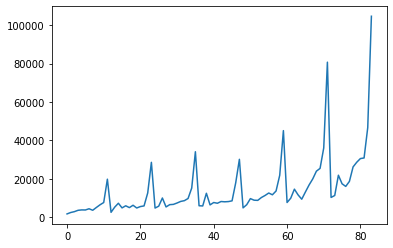

In [826]:
plt.plot(ss.Sales)

### We can clearly see trend and seasonality in our data set. As Trend is increasing magnitude of seasonality is also increasing.

## Let us decompose the data to see components properly

In [827]:
from statsmodels.tsa.seasonal import seasonal_decompose

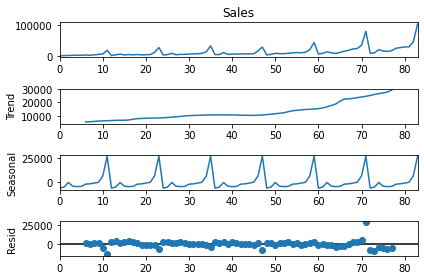

In [828]:
# Decompose and plot using additive approach
add_decomposed = seasonal_decompose(ss['Sales'], model='additive', period = 12)
add_decomposed.plot();

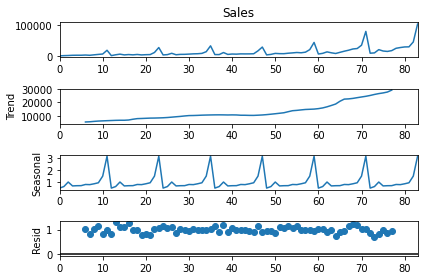

In [829]:
# Decompose and plot using multiplicative approach
multi_decomposed = seasonal_decompose(ss['Sales'], model='multiplicative', period = 12)
multi_decomposed.plot();

### Components visible are:
    1. Trend (Upward)
    2. Seasonality (Every 12 months)
    3. Residual (Random or irregular)

### We can see trend going up and seasonality in every 12 months (freq) in both the approaches. Though in additive decomposition residual was uniform but in last few years we can see spike this indicates that additive cannot explain the increase in magnitude of seasonality in last few years.  

# Part B

Fit a linear trend model with additive seasonality (Model A) and exponential trend
model with multiplicative seasonality (Model B). Consider January as the reference
group for each model. Produce the regression coefficients and the validation set
errors. Remember to fit only the training period.

## Solution Part B
We will be computing:

-> Seasonality:

I. Additive Seasonality (add_season_prediction)  
     
    I.A. Dummy Variables for months created and Linear Regression fit
    I.B. Coeff of Months against sales (Refer month is Jan)
    I.C. Plotted Additive Seasonality against validation data

II. Multiplicative Seasonality (log form = mul_season_prediction_log, orignal = mul_season_prediction)

    II.A. Converted Sales to Log and Linear Regression fit
    II.B. Coeff of Months against sales (Refer month is Jan)
    II.C. Plotted Multiplicative Seasonality against validation data

-> Trend:

III. Linear Trend (lin_trend_prediction)
    
    III.A. Made Time Period (t) column and Linear Regression fit
    III.B. Coeff of Time Period(t) against monthly sales
    III.C. Plotted Linear Trend against validation data

IV. Exponential Trend (exp_trend_prediction)

    IV.A. Time Period (independent) & Log Sales (Dependent) and Linear Regression fit
    IV.B. Coeff of Time Period(t) against monthly sales
    IV.C. Plotted Linear Trend against validation data 

In the end refer dataframe "ss_lr_df" for all the calculation mentioned above. In the bracket I have mentioned the column names present in the dataframe.


-> Models:

V. Model A - Linear Trend and Additive Seasonality Model (III. + I.)

    V.A. Computing Model A (Model_A_Pred) 
    V.B. Ploting Model A Prediction against Test (Validation) Data 
    V.C. Errors (Diff btw Model A Prediction and test (actual) sales)

VI. Model B - Exponential Trend and Multiplicative Seasonality Model (IV. + II.)

    VI.A. Computing Model B (Model_B_Pred)
    VI.B. Ploting Model B Prediction against Test (Validation) Data
    V.C. Errors (Diff btw Model B Prediction and test (actual) sales)


### Creating Dummy Variable for seasonality (I - Additive and II - Multiplicative)

In [830]:
# Set the frequency of the date time index as Monthly start as indicated by the data
ss.index.freq = 'ms'

In [831]:
# Creating Month Column 
ss['month'] = pd.to_datetime(ss['Date'], format = '%Y/%m/%d').dt.strftime('%B')
ss.head()

,Date,Sales,month
0,1995-01-01,1664.81,January
1,1995-02-01,2397.53,February
2,1995-03-01,2840.71,March
3,1995-04-01,3547.29,April
4,1995-05-01,3752.96,May


In [832]:
ss['feb'] = ss['month'].apply(lambda x: 1 if "february" in x.lower() else 0)
ss['mar'] = ss['month'].apply(lambda x: 1 if "march" in x.lower() else 0)
ss['apr'] = ss['month'].apply(lambda x: 1 if "april" in x.lower() else 0)
ss['may'] = ss['month'].apply(lambda x: 1 if "may" in x.lower() else 0)
ss['jun'] = ss['month'].apply(lambda x: 1 if "june" in x.lower() else 0)
ss['jul'] = ss['month'].apply(lambda x: 1 if "july" in x.lower() else 0)
ss['aug'] = ss['month'].apply(lambda x: 1 if "august" in x.lower() else 0)
ss['sep'] = ss['month'].apply(lambda x: 1 if "september" in x.lower() else 0)
ss['oct'] = ss['month'].apply(lambda x: 1 if "october" in x.lower() else 0)
ss['nov'] = ss['month'].apply(lambda x: 1 if "november" in x.lower() else 0)
ss['dec'] = ss['month'].apply(lambda x: 1 if "december" in x.lower() else 0)

ss.head()

,Date,Sales,month,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,1995-01-01,1664.81,January,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,2397.53,February,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,2840.71,March,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,3547.29,April,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,3752.96,May,0,0,0,1,0,0,0,0,0,0,0


Train - Test Split

In [833]:
from sklearn.model_selection import train_test_split

ss_train, ss_test = train_test_split(ss, test_size = 0.2, shuffle = False)

In [834]:
# Further spliting into X and Y variables. X will be dummy variables and Y will sales.
Months = ['feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
X_train, y_train, X_test, y_test = ss_train[Months], pd.DataFrame(ss_train['Sales']), ss_test[Months], pd.DataFrame(ss_test['Sales'])

In [835]:
dict_shape_info = {"X_train": X_train.shape,
                   "X_test": X_test.shape,
                   "y_train": y_train.shape,
                   "y_test": y_test.shape}
print(dict_shape_info)

{'X_train': (67, 11), 'X_test': (17, 11), 'y_train': (67, 1), 'y_test': (17, 1)}


67 Months in Train and 17 Months for Test

## I. Additive Seasonality

#### Additive Model - Linear Regression
Yt = B0 + B1feb + B2mar +...+B11dec

### I.A. Fitting Linear Regression for Add Seasonality

In [836]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
add_lr = LR.fit(X_train, y_train)

In [837]:
# R Sqaure of model on both Train and Test sets.
print("Linear Regression Used")
print(" ")
print("R-Sqaure on Train Set = "+str(np.round(add_lr.score(X_train, y_train), 2)))
print(" ")
print("R-Sqaure on Test Set = "+str(np.round(add_lr.score(X_test, y_test), 2)))
print(" ")

Linear Regression Used
 
R-Sqaure on Train Set = 0.76
 
R-Sqaure on Test Set = -0.24
 


### I.B. coefficients of Additive Model against the months are:

In [838]:
# Checking the Coeff of features in predicting our label.
intercept_coeff_add = {"Intercept": np.round(add_lr.intercept_[0], 2)}
ls_coef = add_lr.coef_.tolist()
ls_coef = ls_coef[0]
n = -1
for col in X_train.columns:
    n += 1
    intercept_coeff_add[col] = np.round(ls_coef[n], 2)

print(intercept_coeff_add)
print(" ")

{'Intercept': 4540.74, 'feb': 1364.75, 'mar': 4899.57, 'apr': 2198.66, 'may': 2427.65, 'jun': 3094.8, 'jul': 4460.75, 'aug': 2864.58, 'sep': 3223.64, 'oct': 4265.8, 'nov': 10477.12, 'dec': 26966.07}
 


As January is our reference month that means that coefficient of feb i.e. 1365 implies that sales in february are 1365 units more than January. Same goes for every month. Coefficents are comparing it self with reference month that in our case is January.

### I.C. Plotting Additive Seasonality on Graph

In [839]:
# Y Test and Prediction Difference
LR_add_Prediction = pd.DataFrame(add_lr.predict(X_test), index = y_test.index)  
ss_lr_df = pd.DataFrame()
ss_lr_df['Sales'] = y_test['Sales']
ss_lr_df['add_season_prediction'] = LR_add_Prediction

Text(0.5, 1.0, 'Train, Test and Predicted comparison in Additive Seasonality using Linear Regression')

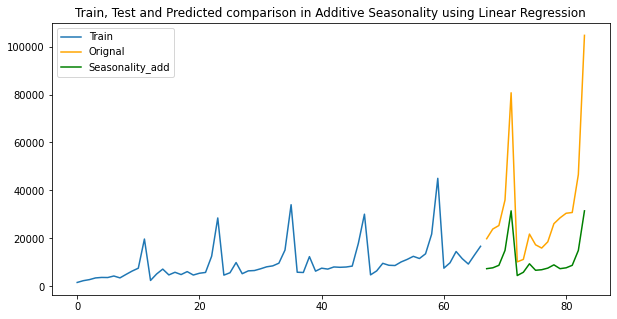

In [840]:
# Linear Regression Model's Prediction compared with Test Data
ss_train['Sales'].plot(legend = True, label = 'Train')
ss_test['Sales'].plot(legend = True, label = 'Orignal', figsize = (10,5), color = 'orange')
ss_lr_df['add_season_prediction'].plot(legend = True, label = 'Seasonality_add', color = 'green')
plt.title('Train, Test and Predicted comparison in Additive Seasonality using Linear Regression')

## II. Multiplicative Seasonality

#### Multiplicative Model - Linear Regression

Yt = a*e^(B1*feb)*e^(B2*mar).......*e^(B11*dec)

Log10(Yt) = B0 + B1feb + B2mar +...+B11dec

Converting y_train and y_test to log base 10

In [841]:
y_log_train, y_log_test = pd.DataFrame(np.log10(y_train['Sales'])), pd.DataFrame(np.log10(y_test['Sales']))

### II.A. Fitting Linear Regression

In [842]:
LR = LinearRegression()
mul_lr = LR.fit(X_train, y_log_train)

In [843]:
# R Sqaure of model on both Train and Test sets.
print("Linear Regression Used")
print(" ")
print("R-Sqaure on Train Set = "+str(np.round(mul_lr.score(X_train, y_log_train), 2)))
print(" ")
print("R-Sqaure on Test Set = "+str(np.round(mul_lr.score(X_test, y_log_test), 2)))
print(" ")

Linear Regression Used
 
R-Sqaure on Train Set = 0.58
 
R-Sqaure on Test Set = -2.51
 


### II.B. coefficients of Multiplicative Model against the months are:

In [844]:
# Checking the Coeff of features in predicting our label.
intercept_coeff_mul = {"Intercept": np.round(mul_lr.intercept_[0], 2)}
ls_coef = mul_lr.coef_.tolist()
ls_coef = ls_coef[0]
n = -1
for col in X_train.columns:
    n += 1
    intercept_coeff_mul[col] = np.round(ls_coef[n], 2)

print(intercept_coeff_mul)
print(" ")

{'Intercept': 3.61, 'feb': 0.13, 'mar': 0.32, 'apr': 0.19, 'may': 0.22, 'jun': 0.24, 'jul': 0.31, 'aug': 0.22, 'sep': 0.26, 'oct': 0.32, 'nov': 0.55, 'dec': 0.88}
 


As January is our reference month that means that coefficient of feb i.e. 0.13 implies that sales in february are 13% more than January. Same goes for every month. Coefficents are comparing it self with reference month that in our case is January.

### II.C. Plotting Multiplicative Seasonality on Graph

In [845]:
# Y Test and Prediction Difference
LR_multi_Prediction = pd.DataFrame(mul_lr.predict(X_test), index = y_log_test.index)  
ss_lr_df['mul_season_prediction_log'] = LR_multi_Prediction
ss_lr_df['mul_season_prediction'] = ss_lr_df['mul_season_prediction_log'].apply(lambda x: 10 ** x)

Text(0.5, 1.0, 'Train, Test and Predicted comparison in Multiplicative Seasonality using Linear Regression')

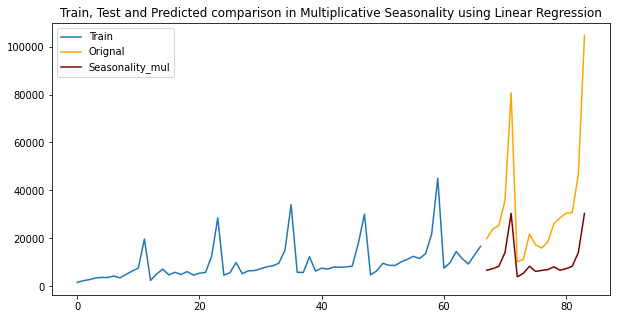

In [846]:
# Linear Regression Model's Prediction compared with Test Data
ss_train['Sales'].plot(legend = True, label = 'Train')
ss_test['Sales'].plot(legend = True, label = 'Orignal', figsize = (10,5), color = 'orange')
ss_lr_df['mul_season_prediction'].plot(legend = True, label = 'Seasonality_mul', color = 'maroon')
plt.title('Train, Test and Predicted comparison in Multiplicative Seasonality using Linear Regression')

## III. Linear Trend 

In [847]:
ss_train['t'] = ss_train.index.map(lambda x: x+1)
ss_test['t'] = ss_test.index.map(lambda x: x+1)

In [848]:
X_train_trend, X_test_trend = pd.DataFrame(ss_train['t']), pd.DataFrame(ss_test['t']) 

### III.A. Fitting Linear Regression for linear trend

In [849]:
LR = LinearRegression()
lin_lr = LR.fit(X_train_trend, y_train)

In [850]:
# R Sqaure of model on both Train and Test sets.
print("Linear Regression Used")
print(" ")
print("R-Sqaure on Train Set = "+str(np.round(lin_lr.score(X_train_trend, y_train), 2)))
print(" ")
print("R-Sqaure on Test Set = "+str(np.round(lin_lr.score(X_test_trend, y_test), 2)))
print(" ")

Linear Regression Used
 
R-Sqaure on Train Set = 0.19
 
R-Sqaure on Test Set = -0.38
 


### III.B. coefficients of Linear Trend Model against the sales per month are:

In [851]:
# Checking the Coeff of features in predicting our label.
intercept_coeff_lin = {"Intercept": np.round(lin_lr.intercept_[0], 2)}
ls_coef = lin_lr.coef_.tolist()
ls_coef = ls_coef[0]
n = -1
for col in X_train_trend.columns:
    n += 1
    intercept_coeff_lin[col] = np.round(ls_coef[n], 2)

print(intercept_coeff_lin)
print(" ")

{'Intercept': 3898.6, 't': 172.38}
 


Sales increase by 172 units per month as per our coefficient.

### III.C. Plotting Linear Trend on Graph

In [852]:
# Y Test and Prediction Difference
LR_lin_Prediction = pd.DataFrame(lin_lr.predict(X_test_trend), index = y_test.index)  
ss_lr_df['lin_trend_prediction'] = LR_lin_Prediction

Text(0.5, 1.0, 'Train, Test and Predicted comparison in Additive Seasonality using Linear Regression')

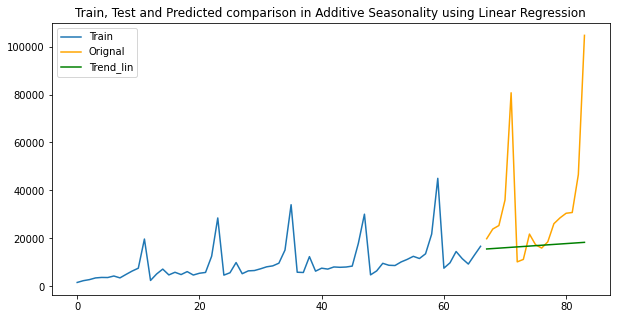

In [853]:
# Linear Regression Model's Prediction compared with Test Data
ss_train['Sales'].plot(legend = True, label = 'Train')
ss_test['Sales'].plot(legend = True, label = 'Orignal', figsize = (10,5), color = 'orange')
ss_lr_df['lin_trend_prediction'].plot(legend = True, label = 'Trend_lin', color = 'green')
plt.title('Train, Test and Predicted comparison in Additive Seasonality using Linear Regression')

Linear trend is not been able to explain the actual trend as shown graphically above.

## IV. Exponential Trend 

### IV.A. Fitting Linear Regression for exponential trend

In [854]:
LR = LinearRegression()
exp_lr = LR.fit(X_train_trend, y_log_train)

In [855]:
# R Sqaure of model on both Train and Test sets.
print("Linear Regression Used")
print(" ")
print("R-Sqaure on Train Set = "+str(np.round(exp_lr.score(X_train_trend, y_log_train), 2)))
print(" ")
print("R-Sqaure on Test Set = "+str(np.round(exp_lr.score(X_test_trend, y_log_test), 2)))
print(" ")

Linear Regression Used
 
R-Sqaure on Train Set = 0.4
 
R-Sqaure on Test Set = -0.26
 


### IV.B. coefficients of exponential Trend Model against the sales per month are:

In [856]:
# Checking the Coeff of features in predicting our label.
intercept_coeff_exp = {"Intercept": np.round(exp_lr.intercept_[0], 2)}
ls_coef = exp_lr.coef_.tolist()
ls_coef = ls_coef[0]
n = -1
for col in X_train_trend.columns:
    n += 1
    intercept_coeff_exp[col] = np.round(ls_coef[n], 2)

print(intercept_coeff_exp)
print(" ")

{'Intercept': 3.6, 't': 0.01}
 


Sales increase by 1% per month as per our coefficient.

### IV.C. Plotting Exponential Trend on Graph

In [857]:
# Y Test and Prediction Difference
LR_exp_Prediction = pd.DataFrame(exp_lr.predict(X_test_trend), index = y_test.index)  
ss_lr_df['exp_trend_prediction_log'] = LR_exp_Prediction
ss_lr_df['exp_trend_prediction'] = ss_lr_df['exp_trend_prediction_log'].apply(lambda x: 10 ** x)

Text(0.5, 1.0, 'Train, Test and Predicted comparison in Additive Seasonality using Linear Regression')

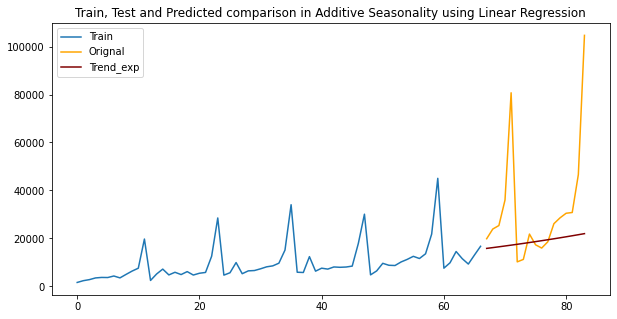

In [858]:
# Linear Regression Model's Prediction compared with Test Data
ss_train['Sales'].plot(legend = True, label = 'Train')
ss_test['Sales'].plot(legend = True, label = 'Orignal', figsize = (10,5), color = 'orange')
ss_lr_df['exp_trend_prediction'].plot(legend = True, label = 'Trend_exp', color = 'maroon')
plt.title('Train, Test and Predicted comparison in Additive Seasonality using Linear Regression')

## V. Model A 

### V.A. Computing Model A 

using the formula mentioned below -> Linear Trend Reg + Additive Seasonality

Yt = (a0 + a1t) + (B0 + B1feb + B2mar +...+B11dec) + E

In [859]:
ss_lr_df['Model_A_Pred'] = ss_lr_df['add_season_prediction'] + ss_lr_df['lin_trend_prediction']

In [860]:
ss_lr_df.head(2)

,Sales,add_season_prediction,mul_season_prediction_log,mul_season_prediction,lin_trend_prediction,exp_trend_prediction_log,exp_trend_prediction,Model_A_Pred
67,19888.61,7405.316,3.828474,6737.113484,15620.576744,4.200284,15859.303623,23025.892744
68,23933.38,7764.374,3.869610,7406.453927,15792.958764,4.209179,16187.467371,23557.332764


### V.B. Ploting Model A Prediction against Test (Validation) Data

Text(0.5, 1.0, 'Train, Test and Predicted (using Model A)')

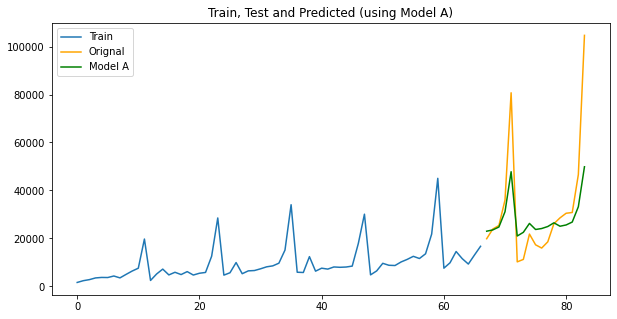

In [861]:
# Linear Regression Model's Prediction compared with Test Data
ss_train['Sales'].plot(legend = True, label = 'Train')
ss_test['Sales'].plot(legend = True, label = 'Orignal', figsize = (10,5), color = 'orange')
ss_lr_df['Model_A_Pred'].plot(legend = True, label = 'Model A', color = 'green')
plt.title('Train, Test and Predicted (using Model A)')

### V.C. Errors Model A

In [862]:
ss_lr_df['Model_A_Error'] =  ss_lr_df['Sales'] - ss_lr_df['Model_A_Pred']

Text(0.5, 1.0, 'Model A Errors')

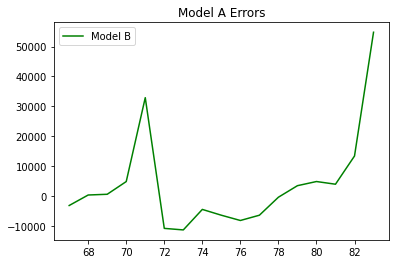

In [863]:
ss_lr_df['Model_A_Error'].plot(legend = True, label = 'Model B', color = 'green')
plt.title('Model A Errors')

## VI. Model B 

### VI.A. Computing Model B

using the formula mentioned below -> Exponential Trend Reg + Multiplicative Seasonality

Log(Yt) = (a0 + a1t) + (B0 + B1feb + B2mar +...+B11dec) + E

In [864]:
ss_lr_df['Model_B_Pred'] = ss_lr_df['mul_season_prediction'] + ss_lr_df['exp_trend_prediction']

In [865]:
ss_lr_df.head(2)

,Sales,add_season_prediction,mul_season_prediction_log,mul_season_prediction,lin_trend_prediction,exp_trend_prediction_log,exp_trend_prediction,Model_A_Pred,Model_A_Error,Model_B_Pred
67,19888.61,7405.316,3.828474,6737.113484,15620.576744,4.200284,15859.303623,23025.892744,-3137.282744,22596.417107
68,23933.38,7764.374,3.869610,7406.453927,15792.958764,4.209179,16187.467371,23557.332764,376.047236,23593.921298


### VI.B. Ploting Model B Prediction against Test (Validation) Data

Text(0.5, 1.0, 'Train, Test and Predicted (Using Model B)')

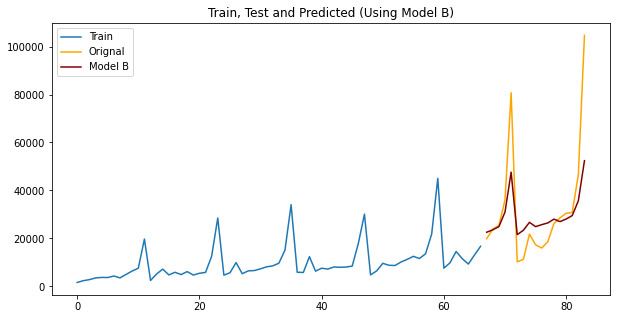

In [866]:
# Linear Regression Model's Prediction compared with Test Data
ss_train['Sales'].plot(legend = True, label = 'Train')
ss_test['Sales'].plot(legend = True, label = 'Orignal', figsize = (10,5), color = 'orange')
ss_lr_df['Model_B_Pred'].plot(legend = True, label = 'Model B', color = 'maroon')
plt.title('Train, Test and Predicted (Using Model B)')

### VI.C. Errors Model B

In [867]:
ss_lr_df['Model_B_Error'] =  ss_lr_df['Sales'] - ss_lr_df['Model_B_Pred']

Text(0.5, 1.0, 'Model B Errors')

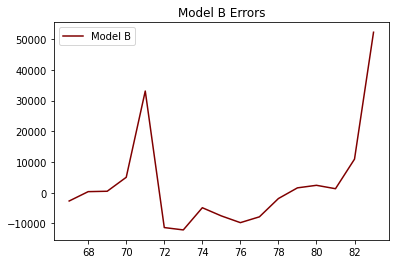

In [868]:
ss_lr_df['Model_B_Error'].plot(legend = True, label = 'Model B', color = 'maroon')
plt.title('Model B Errors')

# Part C

Which model is the best model considering RMSE as the metric? Could you have
understood this from the line chart? Explain. Produce the plot showing the forecasts
from both models along with actual data. In a separate plot, present the residuals
from both models (consider only the validation set residuals).

## Solution Part C
    I. Compute RMSE
    II. Plotting both Model A & B Predictions against test and evaluating models visually.
    III. Errors Plotted

## I. Compute RMSE

In [869]:
# Checking MAE, MSE, RMSE value for our Linear Regression Model.
from sklearn import metrics

# Model A Evaluation
MAE = metrics.mean_absolute_error(ss_lr_df['Sales'], ss_lr_df['Model_A_Pred'])
MSE = metrics.mean_squared_error(ss_lr_df['Sales'], ss_lr_df['Model_A_Pred'])
RMSE = np.sqrt(MSE)

Model_A_eval = [np.round(MAE, 1), np.round(MSE, 1), np.round(RMSE, 1)]

# Model B Evaluation
MAE = metrics.mean_absolute_error(ss_lr_df['Sales'], ss_lr_df['Model_B_Pred'])
MSE = metrics.mean_squared_error(ss_lr_df['Sales'], ss_lr_df['Model_B_Pred'])
RMSE = np.sqrt(MSE)

Model_B_eval = [np.round(MAE, 1), np.round(MSE, 1), np.round(RMSE, 1)]

# ------- Creating Matrix to see evaluations ------------ #
evaluation_matrix = pd.DataFrame()
evaluation_matrix['Model_A_Evaluation'] = Model_A_eval
evaluation_matrix['Model_B_Evaluation'] = Model_B_eval
evaluation_matrix.index = ['MAE', 'MSE', 'RMSE']
evaluation_matrix

,Model_A_Evaluation,Model_B_Evaluation
MAE,10013.2,9734.3
MSE,280007165.0,264825495.8
RMSE,16733.4,16273.5


Considering RMSE as a evaluation metric Model B is slighly better than Model A 

## II. Plotting both Model A & B Predictions against test

Model A

Text(0.5, 1.0, 'Train, Test and Predicted (using Model A)')

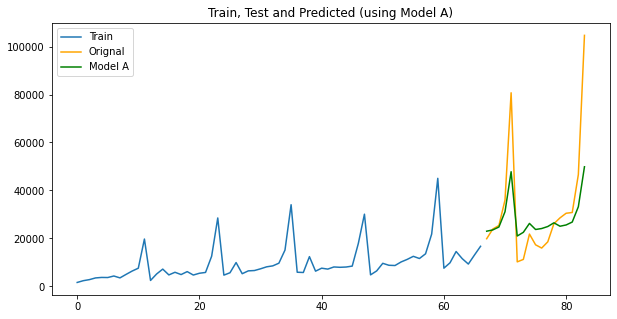

In [870]:
# Linear Regression Model's Prediction compared with Test Data
ss_train['Sales'].plot(legend = True, label = 'Train')
ss_test['Sales'].plot(legend = True, label = 'Orignal', figsize = (10,5), color = 'orange')
ss_lr_df['Model_A_Pred'].plot(legend = True, label = 'Model A', color = 'green')
plt.title('Train, Test and Predicted (using Model A)')

Model B

Text(0.5, 1.0, 'Train, Test and Predicted (Using Model B)')

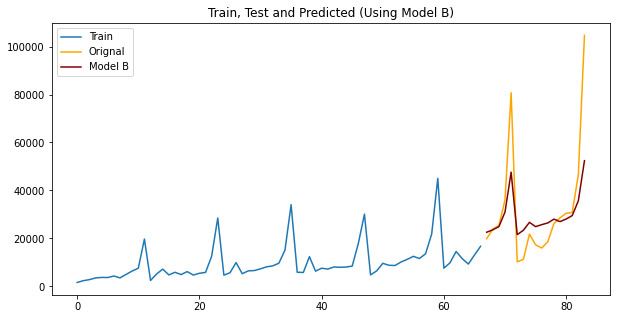

In [871]:
# Linear Regression Model's Prediction compared with Test Data
ss_train['Sales'].plot(legend = True, label = 'Train')
ss_test['Sales'].plot(legend = True, label = 'Orignal', figsize = (10,5), color = 'orange')
ss_lr_df['Model_B_Pred'].plot(legend = True, label = 'Model B', color = 'maroon')
plt.title('Train, Test and Predicted (Using Model B)')

Model A and B

Text(0.5, 1.0, 'Model A and B against Test Data')

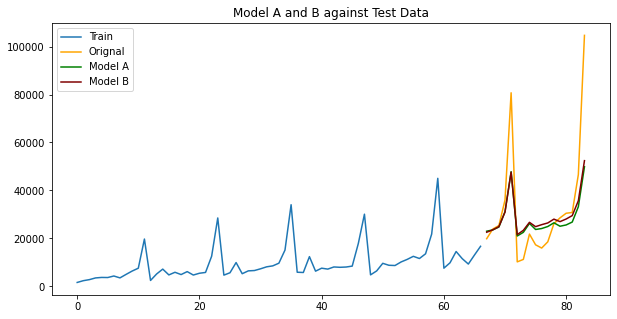

In [872]:
# Linear Regression Model's Prediction compared with Test Data
ss_train['Sales'].plot(legend = True, label = 'Train')
ss_test['Sales'].plot(legend = True, label = 'Orignal', figsize = (10,5), color = 'orange')
ss_lr_df['Model_A_Pred'].plot(legend = True, label = 'Model A', color = 'green')
ss_lr_df['Model_B_Pred'].plot(legend = True, label = 'Model B', color = 'maroon')
plt.title('Model A and B against Test Data')

Visually difference between Model A and B is not clearly visible but again we can see that Model B is slighly predicting better than Model A in last few months.

## III. Errors Plotted

Text(0.5, 1.0, 'Model A & B Errors')

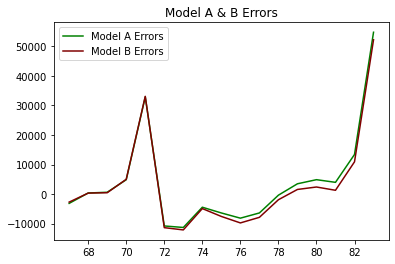

In [873]:
ss_lr_df['Model_A_Error'].plot(legend = True, label = 'Model A Errors', color = 'green')
ss_lr_df['Model_B_Error'].plot(legend = True, label = 'Model B Errors', color = 'maroon')
plt.title('Model A & B Errors')

Again in last few months Error in Model A is slighlt higher than Model B

# Part D

Examine the additive model. Which month has the highest average sales during the
year. What does the estimated trend coefficient in the model A mean?

## Solution Part D
    I. Additive Seasonal Model Interpreted
    II. Month with highest average sales
    III. Estimated Trend Coeff Interpretation 

## I. Additive Model Interpreted

Yt = B0 + B1feb + B2mar +...+B11dec

Coeff in Additive Seasonal Linear Reg Model

In [874]:
print(intercept_coeff_add)

{'Intercept': 4540.74, 'feb': 1364.75, 'mar': 4899.57, 'apr': 2198.66, 'may': 2427.65, 'jun': 3094.8, 'jul': 4460.75, 'aug': 2864.58, 'sep': 3223.64, 'oct': 4265.8, 'nov': 10477.12, 'dec': 26966.07}


As January is our reference month that means that coefficient of feb i.e. 1365 implies that sales in february are 1365 units more than January. Same goes for every month. Coefficents are comparing it self with reference month that in our case is January.

## II. Month with highest average sales

If we interpret coeff from above we can see that December has 26,966 units more sales than Jan followed by November which is 10,477 units more than Jan. 
December is the month with highest average sales through whole timeline.

## III. Estimated Trend Coeff Interpretation

Linear Trend Linear Regression coeff.

In [875]:
print(intercept_coeff_lin)

{'Intercept': 3898.6, 't': 172.38}


Here, coeff means that next month store will be selling 172.4 more units than previous month.

# Part E

Examine the multiplicative model. What does the coefficient of October mean?
What does the estimated trend coefficient in the model B mean?

## Solution Part E
    I. Multiplicative Seasonal Model Interpreted
    II. October Month Coeff. 
    III. Estimated Trend Coeff Interpretation 

## I. Multiplicative Seasonal Model Interpreted

Yt = a*e^(B1*feb)*e^(B2*mar).......*e^(B11*dec)

Log10(Yt) = B0 + B1feb + B2mar +...+B11dec

In [876]:
print(intercept_coeff_mul)

{'Intercept': 3.61, 'feb': 0.13, 'mar': 0.32, 'apr': 0.19, 'may': 0.22, 'jun': 0.24, 'jul': 0.31, 'aug': 0.22, 'sep': 0.26, 'oct': 0.32, 'nov': 0.55, 'dec': 0.88}


As we compare log of Sales (y) here against all the Months (X) and January is our reference month that means that coefficient of feb i.e. 0.13 implies that sales in february are 13% more than January. Same goes for every month. Coefficents are comparing it self with reference month that in our case is January. 

## II. October Month Coeff. 

In [877]:
print(intercept_coeff_mul['oct'])

0.32


coefficient of feb i.e. 0.13 implies that sales in October are 32% more than January.

## III. Estimated Trend Coeff Interpretation 

In [878]:
print(intercept_coeff_exp)

{'Intercept': 3.6, 't': 0.01}


Sales increase by 1% every month from previous month as per our coefficient.

# Part F

Let us use Model B as it had low RMSE

We will be using same model from part B to predict for Jan 2002 

In [879]:
Jan_2002_Test_lin = pd.DataFrame([85], columns = ['t'])
Jan_2002_Test_mul = pd.DataFrame([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], columns = Months)

In [880]:
exp_Trend_F_log = exp_lr.predict(Jan_2002_Test_lin)
mul_Season_F_log = mul_lr.predict(Jan_2002_Test_mul)
exp_Trend_F = 10 ** exp_Trend_F_log
mul_Season_F = 10 ** mul_Season_F_log

In [881]:
Predicted_Jan_2002_f = exp_Trend_F + mul_Season_F
print(Predicted_Jan_2002_f)

[[26492.62720464]]


# Part G

Plot the ACF and PACF plot until lag 20 of the residuals obtained from training set of
the best model chosen. Comment on these plots and think what AR(p) model could
be a good choice? 

In [882]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### We Will be Computing Residual in Training Set using Model B. 

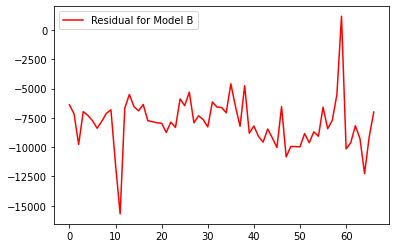

In [883]:
ss = ss[['Date', 'Sales']]

ss_train_residual = pd.DataFrame()
ss_train_residual['Date'] = ss_train['Date']
ss_train_residual['Actual_Sales'] = ss_train['Sales']
ss_train_residual[Months] = ss_train[Months]
ss_train_residual['t'] = X_train_trend['t']

# -- Calculating Multiplicative Seasonality on Train Set
LR_multi_Prediction = pd.DataFrame(mul_lr.predict(ss_train_residual[Months]))  
ss_train_residual['mul_season_prediction_log'] = LR_multi_Prediction
ss_train_residual['mul_season_prediction'] = ss_train_residual['mul_season_prediction_log'].apply(lambda x: 10 ** x)

# -- Calculating Exp Trend on Train Set
LR_exp_Prediction = pd.DataFrame(exp_lr.predict(pd.DataFrame(ss_train_residual['t'])))  
ss_train_residual['exp_trend_prediction_log'] = LR_exp_Prediction
ss_train_residual['exp_trend_prediction'] = ss_train_residual['exp_trend_prediction_log'].apply(lambda x: 10 ** x)

# -- Calculating Prediction using Multiplicative Seasonality + Exp Trend 
ss_train_residual['Model_B_Prediction'] = ss_train_residual['mul_season_prediction'] + ss_train_residual['exp_trend_prediction']

# -- Calculating Residual(Errors)
ss_train_residual['Residual_Model_B'] = ss_train_residual['Actual_Sales'] - ss_train_residual['Model_B_Prediction']

ss_train_residual['Residual_Model_B'].plot(legend = True, label = 'Residual for Model B', color = 'red')
plt.show()

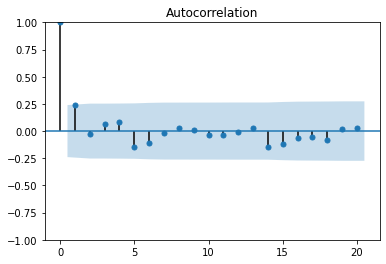

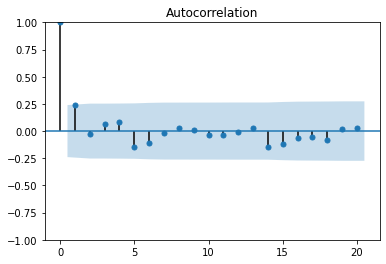

In [884]:
plot_acf(ss_train_residual['Residual_Model_B'], lags=20)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


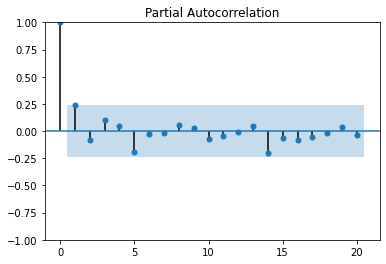

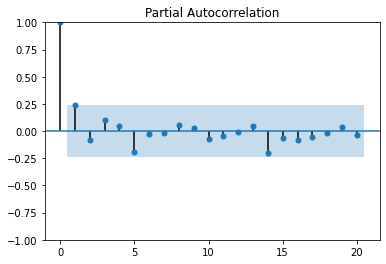

In [885]:
plot_pacf(ss_train_residual['Residual_Model_B'], lags=20)

Both ACF and PACF shows High Correlation at Lag 15.

AR(15) (Auto Regressive with Lag 15) will be appropriate in our case.

# Part H

Fit an AR(p) model as you think appropriate from part (g) to the training set residuals
and produce the regression coefficients. Was your intuition at part (g) correct?

## Fitting the AR(15) model to train set

In [886]:
ss_train = ss_train[['Date', 'Sales']]
ss_test = ss_test[['Date', 'Sales']]

In [887]:
from statsmodels.tsa.ar_model import AutoReg

In [888]:
AR_15 = AutoReg(ss_train_residual['Residual_Model_B'], lags=15).fit()

In [889]:
test_count = ss_test['Date'].count()
forecasts = AR_15.forecast(test_count).tolist()
ss_ar_df = pd.DataFrame(index = ss_test.index)
ss_ar_df['Date'] = ss_test['Date']
ss_ar_df['Actual_Residual'] = ss_lr_df['Model_B_Error']
ss_ar_df['Pred_AR15_Residual'] = forecasts

Text(0.5, 1.0, 'Predicted Residual (Using Model AR(15))')

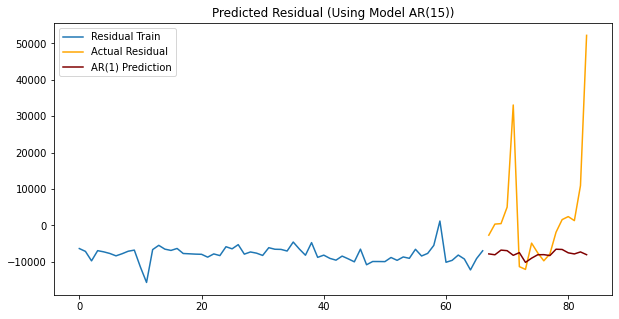

In [890]:
# Linear Regression Model's Prediction compared with Test Data
ss_train_residual['Residual_Model_B'].plot(legend = True, label = 'Residual Train')
ss_ar_df['Actual_Residual'].plot(legend = True, label = 'Actual Residual', figsize = (10,5), color = 'orange')
ss_ar_df['Pred_AR15_Residual'].plot(legend = True, label = 'AR(1) Prediction', color = 'maroon')
plt.title('Predicted Residual (Using Model AR(15))')

In [891]:
# AR12 Evaluation
MAE = metrics.mean_absolute_error(ss_ar_df['Actual_Residual'], ss_ar_df['Pred_AR15_Residual'])
MSE = metrics.mean_squared_error(ss_ar_df['Actual_Residual'], ss_ar_df['Pred_AR15_Residual'])
RMSE = np.sqrt(MSE)

AR15_Eval = {
    "MAE": MAE,
    "MSE": MSE,
    "RMSE": RMSE
}

print(AR15_Eval)

{'MAE': 11604.906561495844, 'MSE': 369550639.0720348, 'RMSE': 19223.699931907875}


There is a correlation in between current month and lag 15 month but the magnitude increase in seasonality is huge. We are performing univariate analysis which means we are considering past sales only to predict furture sales. 

Increase in sales in the month of November and December in last 2 years is because of some other factor(s) may be tourism has increased in New York or their can be some other factor impacting in magnitude increase. I think as a univariate analysis Model B and AR15 has done decent job but we need to consider some other variable in forecasting Souvenir Sales and make a multivariate model.

Also, Time Series model require regular training as trend changes frequently.

# Part I

Now, using the best regression model and AR(p) model, forecast the sales in January
2002. Think carefully which data to use for model fitting in this case.

### I will be using Model B to predict trend and seasonality (From Part f).
### To predict Residual I will be using AR(15). 

### Fitting the Model AR12

In [892]:
Jan_2002_Residual_Pred = AR_15.forecast(test_count+1).tolist()[17]
Jan_2002_Residual_Pred

-8710.45714842877

In [893]:
Predicted_Jan_2002 = exp_Trend_F + mul_Season_F - Jan_2002_Residual_Pred
Predicted_Jan_2002 = Predicted_Jan_2002[0][0]
print(Predicted_Jan_2002)

35203.08435306871


# ---------------------------------------------------------- ---------------------------------------------------------- ---------------------------------------------------------- ---------------------------------------------------------- ---------------------------------------------------------- ---------------------------------------------------------- ---------------------------------------------------------- ---------------------------------------------------------- ---------------------------------------------------------- #

# Q2

# Part a.

## Explain the key difference between cross sectional and time series data?

### Solution

### Time Series Data means that observed values in the dataset are recorded at regular interval of time. For Example Total Monthly Sales, ECG Data, Weather report, etc. Data can be collected per second, minute, hourly, daily etc. in any regular interval of time.

### Whereas Cross Section Data means that observed values in the dataset are recorded at random time. There is no regularity in time while collecting the data. 

# Part b.

## Explain the difference between seasonality and cyclicality?

### Solution

### Seasonality is similar magnitude change in data after regular time interval. Like for example every year pollution in Delhi rises to peak in the month of November whereas it reduces to almost 50% (Hypothetical figure) in the month of April. So every year peak comes in November and lowest point in April, similarly for every month the propotion or rank is same almost.  

### Cyclicality refers to trend. So, Seasonality is maintained but aggregate numbers can change for few time interval. For Example, Offline Retail Sale during Diwali goes to peak every year but regularly for last 5 years during Diwali Offline Retail Sale is reducing. So within a year Diwali shows peak of Sales but next year sales number at Diwali is less than pervious year sales number and this is happening from last 5 years because of the influence of E Commerce, this is known as Cyclicality or in this case downward trend.

# Part c.

## Explain why centered moving average is not-considered suitable for forecasting?

### CMA does not give last data point. It moves behind Trailing Moving Average (TMA) and as we are forecasting for future TMA becomes more logical as it stops at last time period.

# Part d.

## Explain stationarity and why is it important for some time series forecasting methods?

### Solution
 
### Stationary removes the cyclicality or trend of a time series. As per my understanding Cyclicality is not predictable with majority of the data given. It is easy to predict Seasonality. In a way Cyclicality disturbs the calculation of Seasonality. So, it becomes important to remove trend and make it Stationary.  

# Part e.

## How does an ACF plot help to identify whether a time series is stationary or not?

### Solution

### If ACF reduce to 0 at faster pace (Less lags) then that shows that data is not Stationary. Whereas, if it is slow in going to 0 (More Lags) then data is Stationary. It captures trend while checking correlation. 

# Part f.

## Why partitioning time series data into training, validation, and test set is not recommended? Briefly describe two considerations for choosing the width of validation period.

### Solution

### It is not prefered because trend or cyclicality keeps on changing and they are unpredictable with older data so to improve accuracy latest data is always prefered.

### Goal of Forecasting - How many time periods are required for business needs. For Example forcasting of next 3 months is enough so we should evaluate our accuracy of model till next 3 months. 

### Seasonality- At least a complete cycle of Seasonality should be kept for Training Set.  

# Part g.

## Both smoothing and ARIMA method of forecasting can handle time series data with missing value. True/False. Explain?

### Solution

### False, We would say this because it will not be able to capture auto regression and will skip important data points. We need to perform good quality imputation before fitting the model with ARIMA and Smoothing. 

# Part h.

## Additive and multiplicative decomposition differ in the way the trend is computed. True / False? Explain?

### Solution

### True.
### Additive can capture linear trend with good accuracy whereas Multiplicative is good with exponential trends. We simply add trend, seasonality and Error in Additive whereas in Multiplicative we multiply these components.

# Part i.

## After accounting for trend and seasonality in a time series data, the analyst observes that there is still correlation left amongst the residuals of the time series. Is that a good or bad news for the analyst? Explain?

### Solution

### It is a Bad Newz.

### As still there is gap in determing right trend and seasonality as model is regularly predicting wrong with pattern in errors. Maybe the trend is exponential and model is using linear or degree of exponential is low. Correlation signifies that something predictable is missing. If Residual was random and not correlated then it was not possible to predict.